In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from csv files

In [2]:
train_df = pd.read_csv("train.csv", index_col="Loan_ID")
test_df = pd.read_csv("test.csv", index_col="Loan_ID")

In [3]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualise Data

<Axes: >

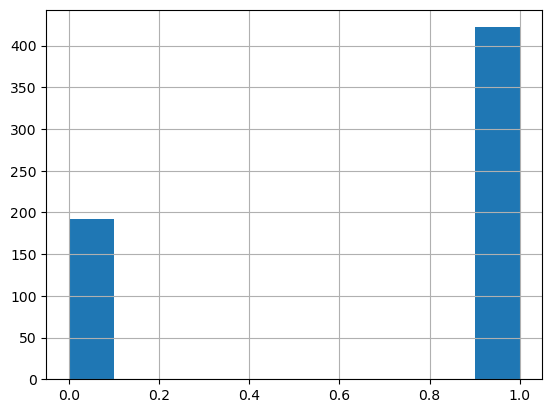

In [9]:
train_df['Loan_Status'].replace({'Y': 1, 'N': 0}).hist()

## Compare by gender

Text(0.5, 1.0, 'Loan status depending on gender')

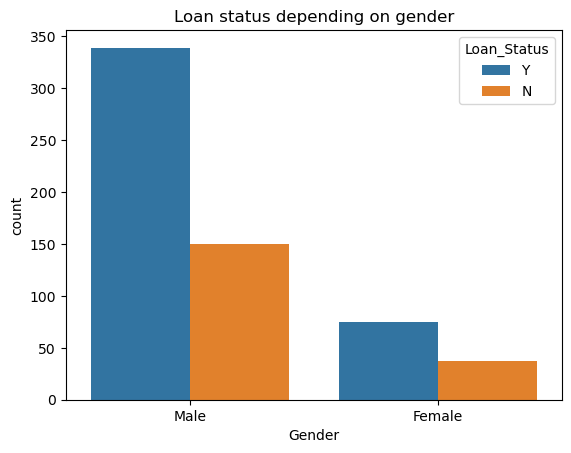

In [11]:
sns.countplot(x="Gender", hue="Loan_Status", data=train_df)
plt.title("Loan status depending on gender")

## Status depending on education

Text(0.5, 1.0, 'Loan status by education')

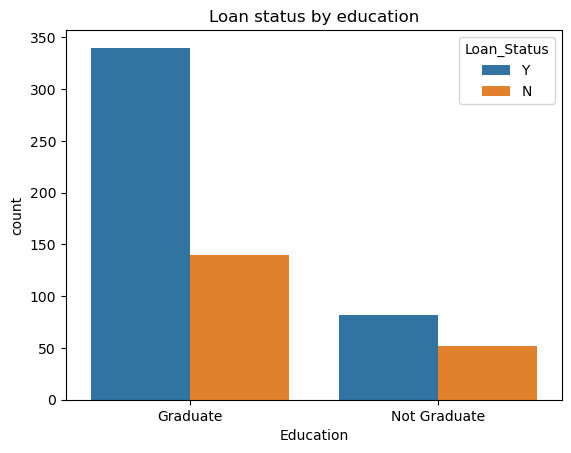

In [12]:
sns.countplot(x="Education", hue="Loan_Status", data=train_df)
plt.title("Loan status by education")

# Data Processing

In [17]:
train_df_no_nan = train_df[train_df.notnull()]
outcome = train_df_no_nan["Loan_Status"]
features = train_df_no_nan.drop(["Loan_Status"], axis=1)
encoded_features = pd.get_dummies(features)

outcome.replace({"Y": 1, "N": 0}, inplace=True)

# Train Model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(encoded_features,outcome,test_size=0.20)